## 单变量线性回归
使用单变量线性回归预测快餐车的利润问题。文件ex1data1.txt为数据集，第一列是一个城市的人口，第二列是该城市快餐车的利润。

2.1 绘制数据，使用散点图可视化数据。

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('data/ex1data1.txt', names =['population', 'profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


使用Numpy读取文本文件数据：
np.loadtxt('filename', delimiter ='\t')
一般用于数值型数据，如多维数组、矩阵，并且只需进行基本的数值计算和操作。
使用Pandas读取文本文件数据
pd.read_csv('filename', delimiter = '\t')
一般用于结构化数据，如表格数据，不同的列有不同的数据类型。Pandas提供了DataFrame数据结构能够轻松地处理这些数据，适合数据预处理。

In [27]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
n = len(y)
m = len(x)

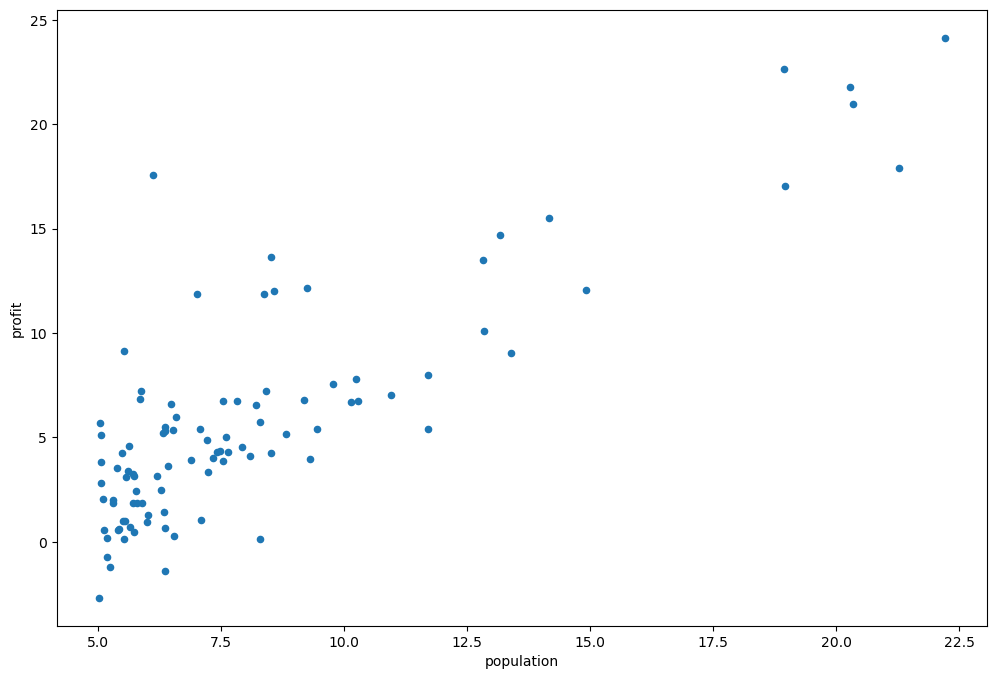

In [28]:
data.plot(kind = 'scatter', x='population', y = 'profit', figsize=(12, 8))
plt.show()

2.2 梯度下降
接下来使用梯度下降法拟合线性回归中的参数$\theta$到我们的数据集。
假设函数的线性模型如下：
$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$
批量梯度下降法：
${\theta_{j}}:={\theta_{j}}-\alpha \frac{\partial }{\partial {\theta_{j}}}J\left(\theta \right)$
注意：把每一个样本作为一行存储在X矩阵中，截距项$\theta_0$额外在X上增加第一列设置为全1，这样就可以当作一个简单特征。

In [21]:
data.insert(0, 'ones', 1) # 在data中增加一列，其中0为列的索引，one为列名，1为值
theta  = np.matrix(np.array([0, 0]))  #创建2个元素的列向量
iterations = 1500
learning_rate = 0.01
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


torch.zeros(m, n)创建m$\times$n的全0矩阵

2.3 计算代价函数
实现一个函数计算$J(\theta)$，完成后使用值为0的$\theta$运行得到的代价函数应该为32.07

In [6]:
#定义损失函数
def loss_function(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

numpy库求幂和求和分别为np.power(), np.sum()

In [22]:
#设置训练集
X = data.loc[:, ['ones', 'population']]
Y = data.loc[:, ['profit']]
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


`.loc()`基于标签的索引，`.iloc`基于整数位置的索引。

In [8]:
Y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


`.head()`是Pandas DataFrame查看前几行数据的特有方法。

In [23]:
#损失函数需要矩阵用于计算，将DataFrame转换成矩阵
X = np.matrix(X.values)
Y = np.matrix(Y.values)
X.shape, theta.shape, Y.shape

((97, 2), (1, 2), (97, 1))

用pytorch的库将DataFrame转换成矩阵的时候，记得要转换的是数据的值。
用numpy库转换同理，np.matrix(X.values)

In [10]:
loss_function(X, Y, theta)

32.072733877455676

2.2.4 梯度下降函数
请记住损失函数$J(\theta)$是通过向量$\theta$参数化的，而不是X和y。假设你已经完美实现了梯度下降法和loss function，你的$J(\theta)$不应该出现增加的值，而是最终收敛于一个稳定值的算法。
最终$\theta$用来预测35000和70000人的利润。请注意用下面的式子来预测而不是显式求和或循环来计算预测。
```
predict1 = [1, 3.5] * theta; predict2 = [1, 7] * thet;
```

算法：
**Repeat {**
​                ${\theta_{0}}:={\theta_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{ \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}$

​                ${\theta_{1}}:={\theta_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$
​               **}**


In [11]:
def gradientDescent(X, y, theta, learning_rate, iterations):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    history_cost = np.zeros(iterations)  #记录每一次的损失
    
    for i in range(iterations):
        error = (X * theta.T) - y
        # 遍历每个θ
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0, j] - ((learning_rate/ len(X)) * np.sum(term))
        theta = temp
        history_cost[i] = loss_function(X, y, theta)
    return theta, history_cost

theta.ravel()将多维参数矩阵展开成一个一维向量，shape是一个包含行数和列数的元组，例如(m, n)表示矩阵有m行n列，所以shape[1]取列数。

In [12]:
g, history_cost = gradientDescent(X, Y, theta, learning_rate, iterations)
g

matrix([[-3.63029144,  1.16636235]])

In [13]:
loss_function(X, Y, g)

4.483388256587726

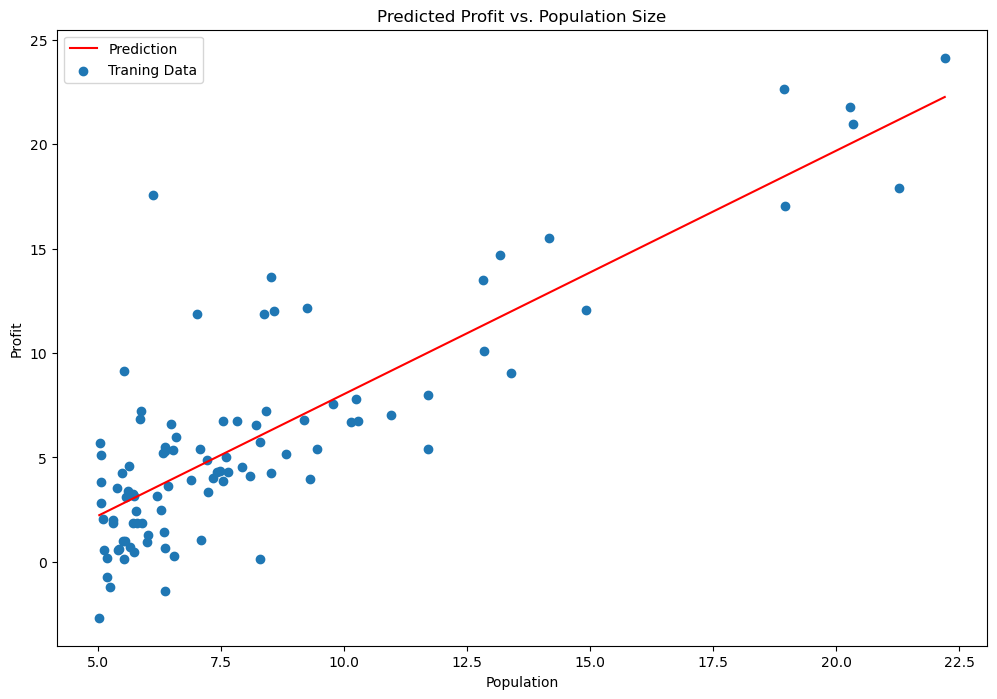

In [14]:
x= np.linspace(data.population.min(), data.population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label = 'Prediction')  #r指定红色线条
ax.scatter(data.population, data.profit, label='Traning Data')  # 绘制散点图
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

* fig, ax = plt.subplots(figsize=(12, 8)): 这行代码使用 plt.subplots() 函数创建一个新的图形和一个轴对象。它将图形对象赋值给 fig 变量，将轴对象赋值给 ax 变量。
* Matplotlib 的 legend() 函数用于添加图例，其中 loc 参数用于指定图例的位置。不同的 loc 参数值将图例放置在不同的位置

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

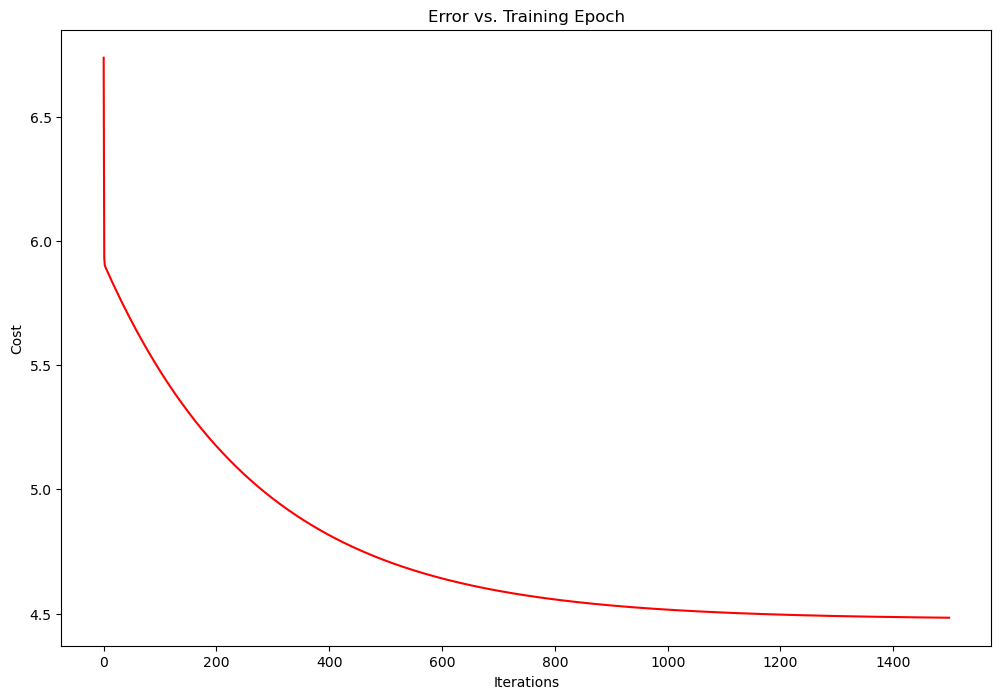

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iterations), history_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

使用scikit-learn的线性回归函数应用在data1上。

In [38]:
from sklearn import linear_model
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('data/ex1data1.txt', names = ['population', 'profit'])
data.insert(0, 'ones', 1)
X = data.loc[:, ['ones', 'population']]
Y = data.loc[:, ['profit']]
model = linear_model.LinearRegression()
model.fit(X, Y)

LinearRegression()

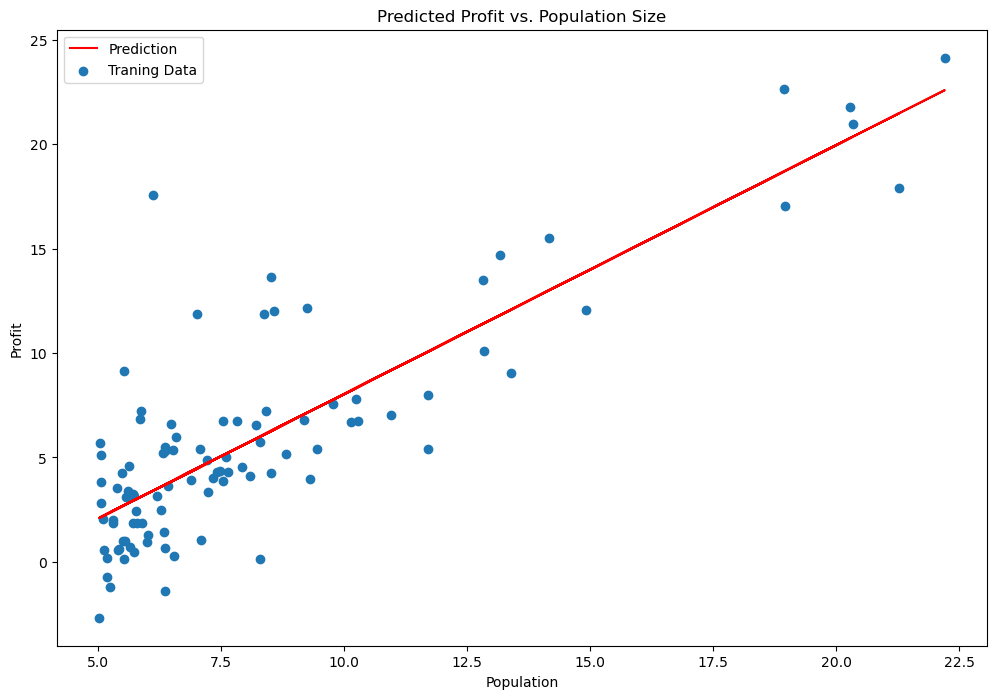

In [40]:
X1 = np.matrix(X.values)
x = np.array(X1[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.population, data.profit, label='Traning Data')
ax.legend(loc = 2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

.flatten() 是一个 NumPy 数组的方法，用于将多维数组转换为一维数组。